# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Is The True Normal (Healthy) Human Body Temperature 98.6 deg F?

***Abstract***: *In this iPython Notebook, I am exploring a dataset containing measurements of human body temperatures. I apply various techniques learnt in the inferential statistics lectures like bootstrap replicates measurement and hypothesis testing.  Rest of this notebook walks the reader through the steps and answers the question whether the normal body temperature is really the reported 98.6 deg F.*

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [56]:
# Your work here.
print(df.info())

df_stats = df.describe()

df_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [151]:
sem = df_stats.loc['std','temperature']/np.sqrt(df['temperature'].count())
print("Estimated standard Error of the mean",sem)
t = (df_stats.loc['mean','temperature'] - 98.6) / sem
print("t value",t)

Estimated standard Error of the mean 0.0643044168379
t value -5.45482329236


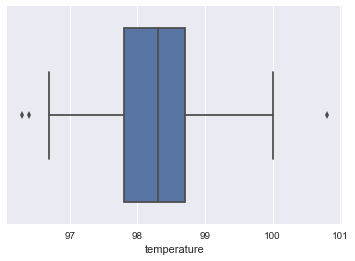

In [102]:
# Examine Box-whisker plot
import seaborn as sns
sns.set()
sns.boxplot(df['temperature'])

There are only 3 outliers.

(array([ 0.06837607,  0.1025641 ,  0.25641026,  0.44444444,  0.51282051,
         0.51282051,  0.25641026,  0.01709402,  0.03418803,  0.01709402]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

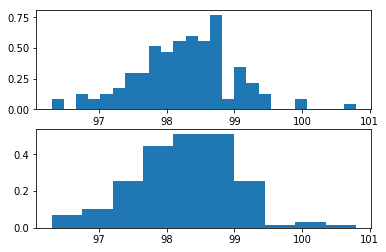

In [12]:
plt.subplot(211)
plt.hist(df['temperature'],bins=25,normed=True)
plt.subplot(212)
plt.hist(df['temperature'],bins=10,normed=True)

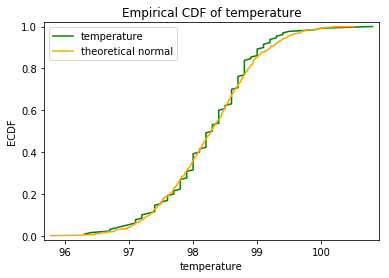

In [82]:
# It is hard to figure out from histograms, due to binning bias. So, let's try ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Call the ECDF and compare it with theoretical
x_t,y_t = ecdf(df['temperature'])

plt.plot(x_t,y_t,color='g')

plt.margins(0.02)

norm_th = np.random.normal(df['temperature'].mean(),df['temperature'].std(),size=1000)

x_th,y_th = ecdf(norm_th)

plt.plot(x_th,y_th,color='orange')

plt.xlabel('temperature')

plt.ylabel('ECDF')

plt.title('Empirical CDF of temperature')

plt.legend(['temperature','theoretical normal'])

1.From the above ECDF plot, distribution of body temperature looks like a normal distribution with the mean and variance equal to those measured from the samples. But it is possible that this is a mere coincidence. We would be evaluating that soon. However, note that this sample is of human body temperature, and to be alive, body temperature has to be in certain range. Humans can't possibly survive below 88 deg or above 108 deg F. So the population in this case can never be normal


2.a) Large or small in what sense? If it is wrt various test choices, sample size is larger than the t-test threshold of 30. But if we really look at what could have been the size for an experiment for measuring human temperature, then 130 seems small. The original experiment involved 25,000 size. Ref : https://www.health.harvard.edu/press_releases/normal_body_temperature

  b) Measurements are independent. If T1 and T2 are temperatures of two different people, the temperature of one person can not influence that of the other person. However, it is a very loose thing to state, because if a place is affected with contagious disease, and measurements were concentrated from that place, they are no longer independent. 
   
   
3.a) I would use "one sample z-test". Here we are trying to evaluate the null hypothesis that mean body temperature = 98.6 F against alternative hypothesis that temperature is < 98.6 F, we have one sample consisting of 130 size to do the same.

   b) We use z statistic because sample size is more than 30. Even though standard deviation information as required by z statistic is not given, since the sample distribution is assumed to be normal by central limit theorem (CLT), we could use z-statistic
It is not clear from course material what are the different types of hypothesis tests, namely one sample, two sample, t and z statistic. Some of it is available here:  https://en.wikibooks.org/wiki/Statistics/Testing_Data/t-tests

In [173]:
# We see that the mean is 98.25, which is less than 98.6. Now this could be just a chance. To see if this is just a chance or real, 
# we find p value. First step, write a function for bootstrap replicates
import numpy as np
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,len(data)))

    return bs_replicates

bs_reps = draw_bs_reps(df['temperature'],np.mean,100000)
emp_mean = 98.6
# Compute and print p-value: p
p = np.sum(bs_reps >= emp_mean) / len(bs_reps)
print('p-value =', p)

p-value = 0.0


Since p value is 0 (which means it is very very small), we reject the null hypothesis that true mean temperature is equal to what is reported.
The true temperature is lower than what is believed to be.

4.Tests with samples with size 10

A one sample t-test needs to be performed. For sample size 10, it is 9 degrees of freedom. We are actually trying to evaluate only if it is less than 98.6. Hence it is left tailed test. To evaluate that, we will have to use python library scipy

In [172]:
from scipy import stats as st
st.ttest_1samp(np.random.choice(df.temperature,10),98.6)

Ttest_1sampResult(statistic=-1.6501671541883485, pvalue=0.1333063723357425)

But note that this gives two sided result. Python has no option for left sided one sample t test. Hence taking real p value to be half of what I got above. I see that for various runs I get different p values, sometimes greater than 0.05, sometimes less than 0.05. Hence with the t test of randomly chosen 10 samples, the result is inconclusive. We don't have enough evidence to reject null hypothesis

In [169]:
bs_reps = draw_bs_reps(np.random.choice(df['temperature'],10),np.mean,100000)
emp_mean = 98.6
# Compute and print p-value: p
p = np.sum(bs_reps >= emp_mean) / len(bs_reps)
print('p-value =', p)

p-value = 7e-05


Even here I get different p values for different runs

5.What temperature is someone's body temperature abnormal?
We will find the answers by evaluating 99% and 95% confidence intervals.

In [147]:
ci_99 = np.percentile(bs_reps,[0.5,99.5])
print('99% confidence interval:',df['temperature'].mean() + ci_99)
ci_95 = np.percentile(bs_reps,[2.5,97.5])
print('95% confidence interval:',df['temperature'].mean() + ci_95)

99% confidence interval: [ 97.91845385  98.57846154]
95% confidence interval: [ 97.99842308  98.50923077]


Taking the numbers from 99% confidence interval, we can consider body temperature to be abnormal, 
if it falls below 97.92 F or goes above 98.58 F

6.Analysing Male and Female differences

In [139]:
ladies = df.loc[df.gender == 'F']['temperature']
men = df.loc[df.gender == 'M']['temperature']
emp_diff_of_means = ladies.mean() - men.mean()
emp_diff_of_means

0.289230769230727

The difference in means is not small enough to ignore.

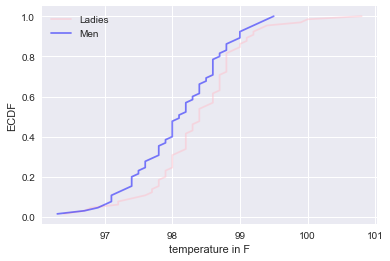

In [141]:
x_l,y_l = ecdf(ladies)
x_m,y_m = ecdf(men)
_ = plt.plot(x_l,y_l,color = 'pink',alpha=0.5)
_ = plt.plot(x_m,y_m,color='blue',alpha=0.5)
_ = plt.xlabel('temperature in F')
_ = plt.ylabel('ECDF')
_ = plt.legend(['Ladies','Men'])

The ECDF plots further gives raise to the opinion that there could be statistically signifant difference between male and female body temperatures

In [140]:
# Two sample hypothesis testing
temp_concat = np.concatenate((ladies,men))

bs_reps = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temp_concat, size=len(temp_concat))
    
    # Compute replicate of difference in means
    bs_reps[i] = np.mean(bs_sample[:len(ladies)]) - np.mean(bs_sample[len(ladies):])
# Compute and print p-value: p
p = np.sum(bs_reps >= emp_diff_of_means) / len(bs_reps)
print('p-value =', p)    

p-value = 0.0141


Since p-value is less than 0.05, we conclude that the difference is statistically significant. That is, there's enough evidence to behave as if the mean body temperature for ladies and gentlemen are different. Temperature of female body is more than that of males